<a href="https://colab.research.google.com/github/SKYUTS/MachineLearning-AI-/blob/main/Training_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.6553 - accuracy: 0.7660
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.4177 - accuracy: 0.8531
Epoch 3/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3553 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3175 - accuracy: 0.8883
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.2967 - accuracy: 0.8935
Test loss: 0.2967451214790344
Test accuracy: 0.8934999704360962


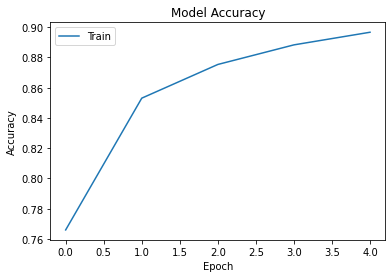

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss and the Adam optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 5 epochs with a batch size of 32
history = model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Plot the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()